# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Intro to Reinforcement Learning

In [2]:
# Reinforcement Learning is one of the most exciting fields of Machine Learning as well as one of the oldest.
# The most high profile uses was the DeepMind system that could learn to play any game and eventually outperform any human on that game.
# Recently in 2017, a Reinforcement Learning system, AlphaGo, beat the world champion of Go.
    # It was previously thought that no computer could ever beat a human at such an open ended game with almost an infinite number of patterns.
    
# The method these designers used was simple: Apply the power of Deep Learning to the Field of Reinforcement Learning.

# In this chapter, we will first explain what Reinforcement Learning is.
# Next we will present two of the most important techniques:
    # Policy Gradients
    # Deep Q-Networks (DQN)

In [3]:
# In reinforcement learning, a software agent makes observations and takes actions within an environment.
#  In return, that agent recieves rewards.
# The agent acts in the environment and learns by trial and error to maximize its pleasure and minimize its pain.


In [4]:
# Here are a few examples:
    # Controling a walking robot.
    # Controlling a character in a video game trying to achieve an objective.
    # Play a board game.
    # Smart thermostat or smart house with the objective of saving energy and allowing the humans in that dwelling to be comfortable.
    # Observing and predicting stock prices, and choosing when to buy and sell with the objective of maximum monetary gains.
    # Self-driving cars,
    # Placing ads for a particular user.
    # Military predictive technology

# Policy Search

In [5]:
# The algorithm used by the software agent to determine its actions is called its policy.
# An example could be a neural network taking observations as inputs and outputting actions to take.

# Stochastic Policy is a policy that involves some randomness in how a software agent determines its actions.

# Policy parameters are variables that can be tweaked by the algorithm to improve performance at a task.

# Policy search is the algorithm's attempt to find the best combination of values in the parameters.
# However, if the policy space is too large, finding a good set of paramaters can be very difficult and time-consuming.

# Genetic Algorithms is another way to explore policy space.
    # You could randomly create a first generation of 100 policies and try them out.
    # Then kill the 80 worst policies and make the 20 survivors produce 4 offspring each.
    # Offspring are just a copy of the parent plus some random variation.
    # The offspring and surviving policies are the next generation.
    # This process can be repeated over and over again until a good solution is reached.
    
# Another approach is to use optimization techniques, by evaluating the gradients of the rewards with regards to the policy parameters.
# Then tweaking these parameters by following the gradient towards higher rewards.
# This approach is called Policy Gradients

# Introduction to OpenAI Gym

In [6]:
# One of the challenges of Reinforcement Learning is that in order to train an agent, you need to have a working environment.
    # To train a walking robot, you need a place for the robot to walk around in. And if it falls off a cliff, you can't just undo that..
    # Also, you can't just speed up time for meat world applications..
    
# In general, training is hard and slow in the real world, so you at least need a simulated environment to bootstrap the process.

# OpenAI gym is a toolkit that provides a wide variety of simulated environments (Atari games, board games, 2D and 3D environments...)
    # Allows you to train agents, compare them, or develop new RL algorithms.
    

In [7]:
# Let's start by importing OpenAI gym:

import gym

In [8]:
# Next we will load the MsPacman environment, version 0:

env = gym.make('MsPacman-v0')

In [9]:
# Let's initialize the environment by calling the reset() method. This returns an observation:

obs = env.reset()

In [10]:
# Observations vary depending on the environment. 
# In this case it is an RGB image represented as a 3D NumPy array of:
    # shape [width, height, channels](with 3 channels: Red, Green, Blue)
    # In other environments it may return different objects, as we will see later.
    
obs.shape

(210, 160, 3)

In [11]:
# An environment can be visualized by calling its render() method,
# And you can pick the rendering mode (the rendering options depend on the environment)
# In this example we will set mode="rgb_array" to get an image of the environment as a Numpy array:

img = env.render(mode="rgb_array")

<IPython.core.display.Javascript object>


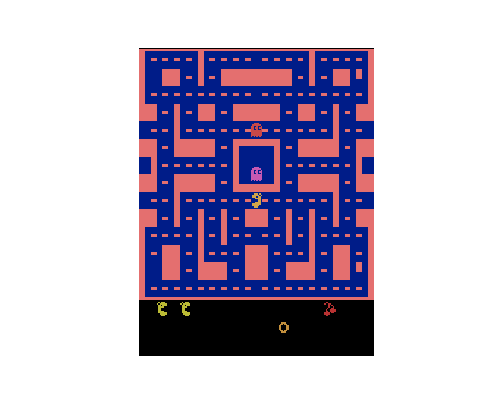

In [12]:
# Let's plot this image:

plt.figure(figsize=(5, 4))
plt.imshow(img)
plt.axis("off")
plt.savefig("MsPacman")
plt.show()

In [13]:
# The step() function actually returns several important objects:
obs, reward, done, info = env.step(0)

In [14]:
# The observation tells the agent what the environnment looks like, as discussed earlier.
# This is a 210x160 RGB image:

obs.shape

(210, 160, 3)

In [15]:
# The environment also tells the agent how much reward it got during the last step:

reward

0.0

In [16]:
# When the game is over, the environment also tells the agent how much reward it got during the last step:

reward

0.0

In [17]:
# When the game is over, the environment returns done=True:

done

False

In [18]:
# Finally, info is an environment-specific dictionary that can provide some extra info about the internal state of the environment. 
# This is useful for debugging, but your agent should not use this information for learning(it would be cheating).

info

{'ale.lives': 3}

In [19]:
# Let's play one full game (with 3 lives), by moving in random directions for 10 steps at a time, recording each frame:

frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample() # play randomly
    obs, reward, done, info = env.step(action)
    if done:
        break

In [20]:
# Now show the animation (it's a bit jittery in Jupyter):

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close() # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

<IPython.core.display.Javascript object>


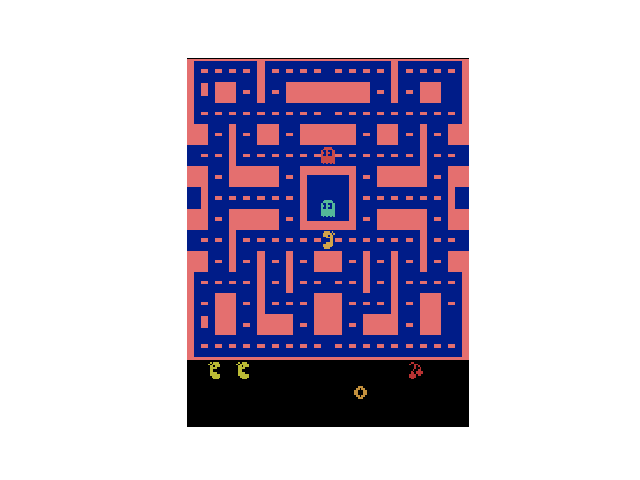

In [21]:
video = plot_animation(frames)
plt.show()

In [22]:
# Once you have finished playing with an environment, you should close it to free up resources:

env.close()

In [23]:
# To code our first learning agent, we will be using a simpler environment: the Cart-Pole

# A simple environment: the Cart-Pole

In [24]:
# The Cart-Pole is a very simple environment composed of a cart that can move left or right,
# And a pole placed vertically on top of it. 
# The agent must move the cart left or right to keep the pole upright.

# The make() function creates the environment.
env = gym.make("CartPole-v0")

In [25]:
# Initialize the environment using the reset() method:
obs = env.reset()

In [26]:
# This returns the first observation. Observations depend on the type of environment.
obs

array([ 0.00741615,  0.01088618, -0.00019299, -0.01544287])

In [27]:
# The observation is a 1D Numpy array composed of 4 floats:
    # The cart's horizontal position.
    # The cart's velocity
    # the angle of the pole(0 = vertical)
    # The anglar velocity

In [28]:
# Let's render the environment.
# However, ew must first fix the rendering issue.

# Some environments (including Cart-Pole) require access to your display, which opens up a separate window.
# Even if you specify the rgb_array mode.
# The window can be ignored. However, if Jupyter is running on a headless server(without a screen), it will raise an exception.
# One way to avoid this is to install a fake server like Xvfb

In [29]:
# If Jupyter is running on a headless server but you don't want to worry about Xvfb, 
# then you can just use the following rendering function for Cart-Pole:

from PIL import Image, ImageDraw
try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True # No problem, let's use OpenAI gym's rendering function

except Exception:
    openai_cart_pole_rendering = True # no problem, let's use our own rendering function
    
def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w //80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red
            
        pos, vel, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w //x_width + img_w // x_width
        cart_y = img_h *  95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)
    
def plot_cart_pole(env, obs):
    plt.close() # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
        


<IPython.core.display.Javascript object>


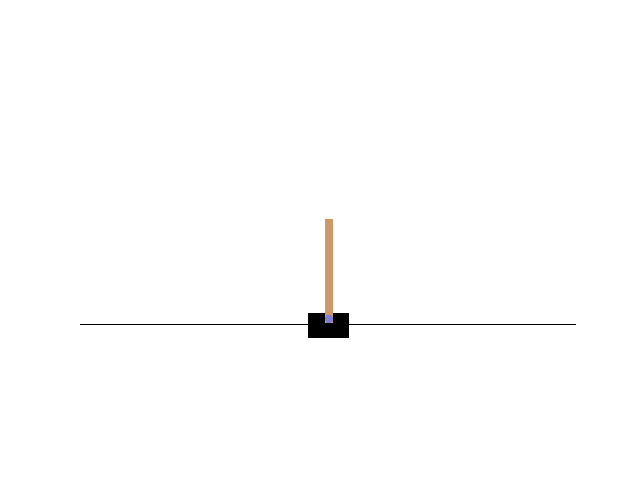

In [30]:
plot_cart_pole(env, obs)

In [31]:
# Now let's look at the action space:

env.action_space

# The code will show that there are two possible actions: 
    # Accelerate towards the left 
    # Accelerate towards the right

Discrete(2)

In [32]:
# Let's push the cart left until the pole falls:

obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

<IPython.core.display.Javascript object>


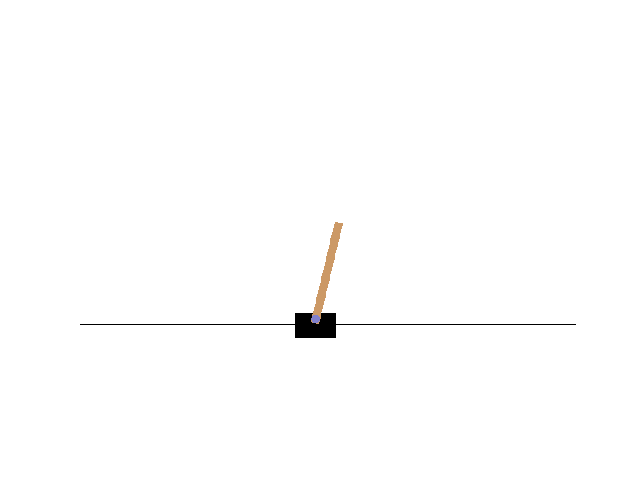

In [33]:
plt.close() # Or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")
plt.savefig("cart_pole_plot")

In [34]:
img.shape

(400, 600, 3)

In [35]:
# Notice that the game is over when the pole tilts too much, 
# Not when it actually falls.
# Now let's reset the environment and push the cart to the right instead:

obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break

<IPython.core.display.Javascript object>


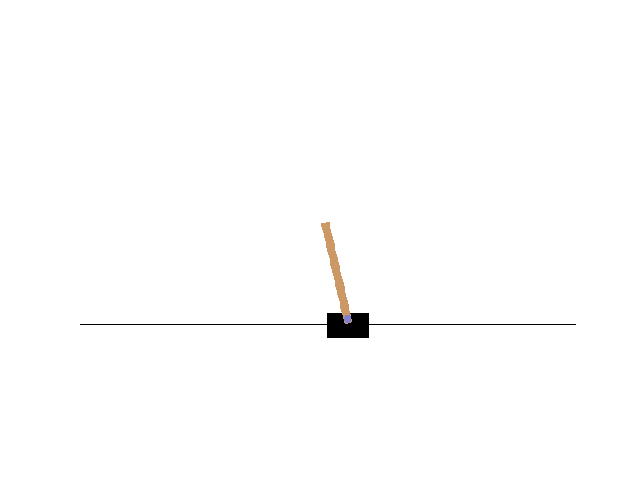

In [36]:
plot_cart_pole(env, obs)

In [37]:
# It seems that that algorithm is doing what we say.
# Now how can we make the poll remain upright?
# We will need to define a Policy for that.

# The Policy is the strategy that the agent will use to select an action at each step.
# It can use all the past actions and observations to decide what to do.

# A simple hard-coded policy

In [38]:
# Let's hard code a simple strategy: 
    # if the pole is tilting to the left, then push the cart to the left.
    # And Vice Versa

# Let's see if it works:

frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)
    
    # hard-coded policy
    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1
        
    obs, reward, done, info = env.step(action)
    if done:
        break

<IPython.core.display.Javascript object>


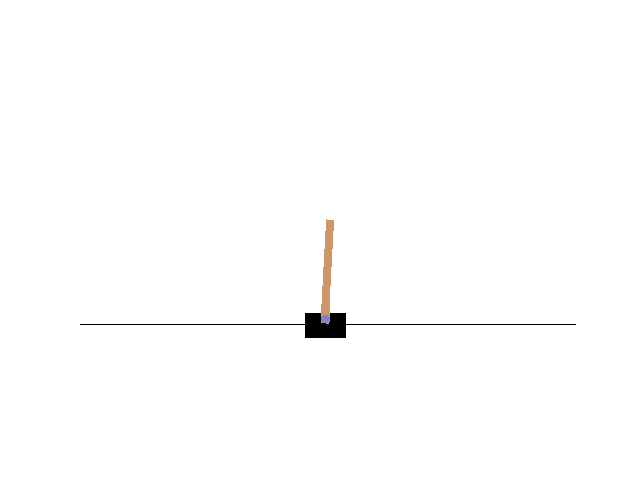

In [39]:
video = plot_animation(frames)
plt.show()

# You'll see that the system is unstable after just a few wobbles,
# The pole ends up too tilted and the game is over.
# We need to create a better policy!

# Neural Network Policies

In [40]:
# Let's create a neural network that will take observations as inputs,
# and output the action to take for each observation.
# To choose an action, the network will estimate a probability for each action,
# then select an action randomly according to estimated probabilities.

# In the case of the Cart-Pole environment, there are just two possible actions (left or right),
# so we only need one input neuron: it will output the probability p of the action 0 (left),
# and of course the probability of action 1 (right) will be 1 - p.

import tensorflow as tf

# 1. Specify the network architecture:
n_inputs = 4 # == env.observation_space.shape[0]
n_hidden = 4 # it's a simple task, we don't need more than this
n_outputs = 1 # only outputs the probability of accelerating left
initializer = tf.variance_scaling_initializer()

# 2. Build the neural network:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
outputs = tf.layers.dense(hidden, n_outputs, activation=tf.nn.sigmoid, kernel_initializer=initializer)

# 3. Select a random action based on the estimated probabilities
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

init = tf.global_variables_initializer()

/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:472: FutureWarnin

In [41]:
# In this particular environment, the past actions and observations can safely be ignored, since each observation contains the environment's full state.
# If there were some hidden state then you may need to consider past actions,
# and observations in order to try to infer the hidden state of the environment.

# You may wonder why we are picking a random action based on probability given by the policy network,
# rather than just picking the action with the highest probability.
# This approach lets the agent find the right balance between exploring new actions,
# and exploiting actions that are known to work well:

# Let's randomly initialize this policy neural network and use it to play one game:

n_max_steps = 1000
frames = []

with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break

env.close()

<IPython.core.display.Javascript object>


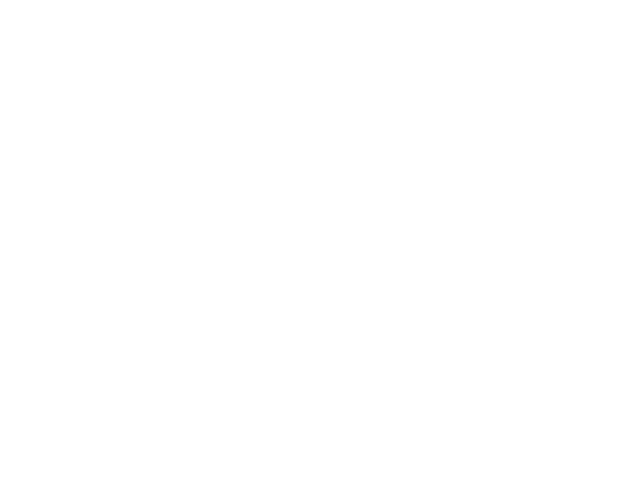

In [42]:
# Now let's look at how well this randomly initialized policy network performed:

video = plot_animation(frames)
plt.show()

In [43]:
# The performance was quite bad. 
# The neural network will have to do better.
# First, let's see if it is capable of learning the basic policy we used earlier:
    # go left if the pole is tilting left, 
    # go right if it is tilting right.

# The following code defines the same neural network,
# but we add the target probabilities y, and the training operations (cross_entropy, optimizer, and training_op):

import tensorflow as tf

reset_graph()

n_inputs = 4
n_hidden = 4
n_outputs = 1

learning_rate = 0.01

initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
y = tf.placeholder(tf.float32, shape=[None, n_outputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits) # probability of actio 0 (left)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [44]:
# We can make the same net play in 10 different environments in parallel,
# and train for 1000 iterations.
# We also reset environments when they are done.

n_environments = 10
n_iterations = 1000

envs = [gym.make("CartPole-v0") for _ in range(n_environments)]
observations = [env.reset() for env in envs]

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        target_probas = np.array([([1.] if obs[2] < 0 else [0.]) for obs in observations]) # if angle<0 we want proba(left)=1., or else proba=0.
        action_val, _ = sess.run([action, training_op], feed_dict={X: np.array(observations), y: target_probas})
        for env_index, env in enumerate(envs):
            obs, reward, done, info = env.step(action_val[env_index][0])
            observations[env_index] = obs if not done else env.reset()
    saver.save(sess, "./my_policy_net_basic.ckpt")

for env in envs:
    env.close()

In [45]:
def render_policy_net(model_path, action, X, n_max_steps = 1000):
    frames = []
    env = gym.make("CartPole-v0")
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
            obs, reward, done, info = env.step(action_val[0][0])
            if done:
                break
    env.close()
    return frames
    

INFO:tensorflow:Restoring parameters from ./my_policy_net_basic.ckpt


<IPython.core.display.Javascript object>


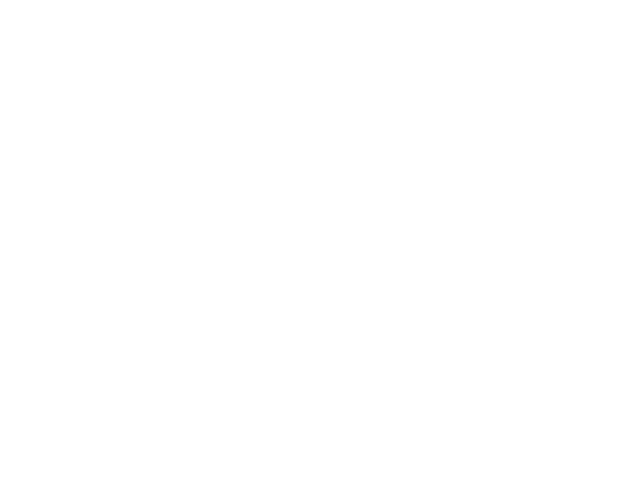

In [46]:
frames = render_policy_net("./my_policy_net_basic.ckpt", action, X)
video = plot_animation(frames)
plt.show()

In [47]:
# It looks like it learned the correct policy. Now let's see if it can learn a better policy on its own.

# Policy Gradients

In [48]:
# To train Policy Gradients in the neural network, we will need to define the target probabilities.
# If an action is good we should increase its probability.
# If the action is bad, we should decrease the probability.

# But how do we decide whether an action is good or bad if most actions have delayed effects?
    # Was it the last action? the last 10 actions? 
    # This is called the credit assignment problem.
    
# The Policy Gradients algorithm attempts to solve this problem by first playing multiple games.
# It then makes actions in good games slightly more likely, while actions in bad games are made slightly less likely.

# First we play, then we go back and think about what we did:

import tensorflow as tf

reset_graph()

n_inputs = 4
n_hidden = 4
n_outputs = 1

learning_rate = 0.01

initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits) #probability of action 0 (left)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


In [49]:
# Now let's move on to the Execution Phase:
# We need a couple of functions to compute the total discounted rewards,
# given the raw rewards,
# and to normalize the results across episodes:

def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/reward_std for discounted_rewards in all_discounted_rewards]

In [50]:
# Let's check that this works:

discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22., -40., -50.])

In [51]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [52]:
# The call to discount_rewards() returns exactly what we expect:

discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22., -40., -50.])

In [53]:
# You can verify that the function discount_and_normalize_rewards() does indeed return the normalized scores for each action in both episodes.

discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

# Notice that the first episode was much worse than the second, so its normalized scores are all negative.
# All actions from the first episode would be considered bad, and the second would be good

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [54]:
# We now have all we need to train the policy:

env = gym.make("CartPole-v0")

n_games_per_update = 10 # train the policy every 10 episodes
n_max_steps = 1000 # max steps per episode
n_iterations = 250 # number of training iterations
save_iterations = 10 # save the model every 10 training iterations
discount_rate = 0.95 # the discount factor

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("\rIteration: {}".format(iteration), end="")
        all_rewards = []
        all_gradients = []
        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run([action, gradients], feed_dict={X: obs.reshape(1, n_inputs)})
                obs, reward, done, info = env.step(action_val[0][0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)
            
        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)
        feed_dict = {}
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index] for game_index, rewards in enumerate(all_rewards) for step, reward in enumerate(rewards)], axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess, "./my_policy_net_pg.ckpt")
            

Iteration: 249

In [55]:
env.close()

INFO:tensorflow:Restoring parameters from ./my_policy_net_pg.ckpt


<IPython.core.display.Javascript object>


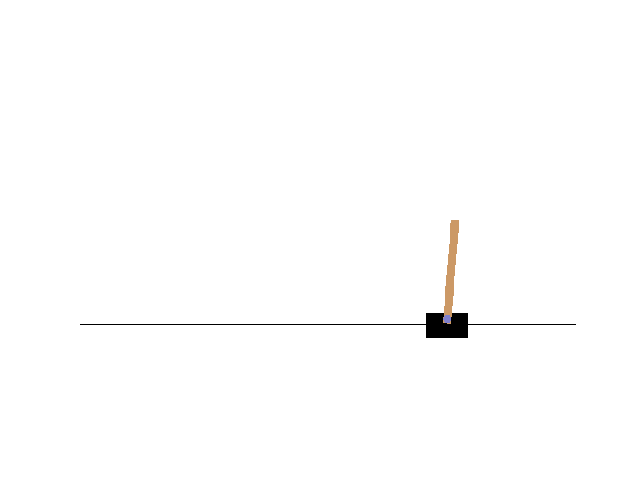

In [56]:
frames = render_policy_net("./my_policy_net_pg.ckpt", action, X, n_max_steps=1000)
video = plot_animation(frames)
plt.show()

In [57]:
# This code will successfully allow the neural network policy to learn to balance the pole on the cart.
# However, it will still lose the game because the cart moves off the screen.
# With 250 iterations, the policy can learn to balance the pole, but it'll probably take a few hundred more iterations to not fall off the screen.

# Despite the Policy Gradients alogorithm simplicity, it is a very powerful algorithm. AlphaGo was based off this algorithm.

# Markov Chains

In [58]:
# I don't exactly understand this shit.
# Markov Decision Processes are stochastic processes with no memory.
# Such a process has a fixed number of states, and it randomly evolves from one state to another at each step.
# The probability of state transition is fixed and doesn't depend on previous states.

# As it applies to machine learning, the agent can choose several possible actions, 
# and the transition probablities depend on the chosen action.
# Some state transitions return a reward (positive or negative)
# The agent's goal is to find the policy that will maximize rewards over time.
# Given enough iterations, the agent will eventually create the optimum policy that maximizes rewards.

In [59]:
transition_probabilities = [
        [0.7, 0.2, 0.0, 0.1], # from s0 to s0, s1, s2, s3
        [0.0, 0.0, 0.9, 0.1], # from s1 to....
        [0.0, 1.0, 0.0, 0.0], # from s2 to....
        [0.0, 0.0, 0.0, 1.0], # from s3 to....
    ]

n_max_steps = 50

def print_sequence(start_state=0):
    current_state = start_state
    print("States:", end=" ")
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4), p=transition_probabilities[current_state])
    else:
        print("...", end="")
    print()
    
for _ in range(10):
    print_sequence()
        
    

States: 0 0 3 
States: 0 1 2 1 2 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 ...
States: 0 0 3 
States: 0 0 0 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 


# Markov Decision Processes

In [60]:
# Let's apply the Markov Decision Processes through code: (fig 16-8 pg. 465)

transition_probabilities = [
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], # in s0, if action a0 then proba 0.7 to state s0 amd 0.3 to state s1, etc.
        [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
        [None, [0.8, 0.1, 0.1], None],
    ]

rewards = [
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]],
    ]

possible_actions = [[0, 1, 2], [0, 2], [1]]

def policy_fire(state):
    return [0, 2, 1][state]

def policy_random(state):
    return np.random.choice(possible_actions[state])

def policy_safe(state):
    return [0, 0, 1][state]

class MDPEnvironment(object):
    def __init__(self, start_state=0):
        self.start_state=start_state
        self.reset()
    def reset(self):
        self.total_rewards = 0
        self.state = self.start_state
    def step(self, action):
        next_state = np.random.choice(range(3), p=transition_probabilities[self.state][action])
        reward = rewards[self.state][action][next_state]
        self.state = next_state
        self.total_rewards += reward
        return self.state, reward
    
def run_episode(policy, n_steps, start_state=0, display=True):
    env = MDPEnvironment()
    if display:
        print("States (+rewards):", end=" ")
    for step in range(n_steps):
        if display:
            if step ==10:
                print("...", end=" ")
            elif step < 10:
                print(env.state, end=" ")
        action = policy(env.state)
        state, reward = env.step(action)
        if display and step < 10:
            if reward:
                print("({})".format(reward), end=" ")
                
    if display:
        print("Total rewards =", env.total_rewards)
    return env.total_rewards

for policy in (policy_fire, policy_random, policy_safe):
    all_totals = []
    print(policy.__name__)
    for episode in range(1000):
        all_totals.append(run_episode(policy, n_steps=100, display=(episode<5)))
    print("Summary: mean={:.1f}, std={:1f}, min={}, max={}".format(np.mean(all_totals), np.std(all_totals), np.min(all_totals), np.max(all_totals)))
    print()

policy_fire
States (+rewards): 0 (10) 0 (10) 0 1 (-50) 2 2 2 (40) 0 (10) 0 (10) 0 (10) ... Total rewards = 210
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 1 (-50) 2 2 (40) 0 (10) ... Total rewards = 70
States (+rewards): 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = 70
States (+rewards): 0 1 (-50) 2 1 (-50) 2 (40) 0 (10) 0 1 (-50) 2 (40) 0 ... Total rewards = -10
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) ... Total rewards = 290
Summary: mean=121.1, std=129.333766, min=-330, max=470

policy_random
States (+rewards): 0 1 (-50) 2 1 (-50) 2 (40) 0 1 (-50) 2 2 (40) 0 ... Total rewards = -60
States (+rewards): 0 (10) 0 0 0 0 0 (10) 0 0 0 (10) 0 ... Total rewards = -30
States (+rewards): 0 1 1 (-50) 2 (40) 0 0 1 1 1 1 ... Total rewards = 10
States (+rewards): 0 (10) 0 (10) 0 0 0 0 1 (-50) 2 (40) 0 0 ... Total rewards = 0
States (+rewards): 0 0 (10) 0 1 (-50) 2 (40) 0 0 0 0 (10) 0 (10) ... Total rewards = 40

# Q-Learning

In [61]:
# Q-Learning works by watching an agent play(e.g randomly) and gradually improving its estimates of the Q-values.
# Once it has accurate Q-Value estimates (or close enough), 
# Then the optimal policy consists in choosing the action that has the highest Q-Value(i.e, the greedy policy)

n_states = 3
n_actions = 3
n_steps = 20000
alpha = 0.01
gamma = 0.99
exploration_policy = policy_random
q_values = np.full((n_states, n_actions), -np.inf)
for state, actions in enumerate(possible_actions):
    q_values[state][actions]=0
    
env = MDPEnvironment()
for step in range(n_steps):
    action = exploration_policy(env.state)
    state= env.state
    next_state, reward = env.step(action)
    next_value = np.max(q_values[next_state]) # greedy policy
    q_values[state, action] = (1 - alpha)*q_values[state, action] + alpha*(reward + gamma * next_value)

In [62]:
def optimal_policy(state):
    return np.argmax(q_values[state])

In [63]:
q_values

array([[39.13508139, 38.88079412, 35.23025716],
       [18.9117071 ,        -inf, 20.54567816],
       [       -inf, 72.53192111,        -inf]])

In [64]:
all_totals = []
for episode in range(1000):
    all_totals.append(run_episode(optimal_policy, n_steps=100, display=(episode<5)))
print("Summary: mean={:.1f}, std={:1f}, min={}, max={}".format(np.mean(all_totals), np.std(all_totals), np.min(all_totals), np.max(all_totals)))
print()

States (+rewards): 0 (10) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 1 (-50) 2 (40) 0 (10) ... Total rewards = 230
States (+rewards): 0 (10) 0 (10) 0 (10) 0 1 (-50) 2 2 1 (-50) 2 (40) 0 (10) ... Total rewards = 90
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = 170
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = 220
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) ... Total rewards = -50
Summary: mean=125.6, std=127.363464, min=-290, max=500



# Learning to Play MsPacman Using the DQN Algorithm

# Preprocessing

In [97]:
# Preprocessing the images is optional but greatly speeds up training:

mspacman_color = 210 + 164 + 74

def preprocess_observation(obs):
    img = obs[1:176:2, ::2] # crop and downsize
    img = img.sum(axis=2) # to greyscale
    img[img==mspacman_color] = 0 # Improve contrast
    img = (img // 3 - 128).astype(np.int8) # normalize from -128 to 127
    return img.reshape(88, 80, 1)

img = preprocess_observation(obs)

# Note that that preprocess_observation() function is slightly different from the one in the book:
# Instead of representing pixels as 64-bit floats from -1.0 to 1.0,
# it represents them as signed bytes(from -128 to 127)
# The benefit is that the replay memory will take up roughly 8 times less RAM
# The reduced precision has no visible impact on training

<IPython.core.display.Javascript object>


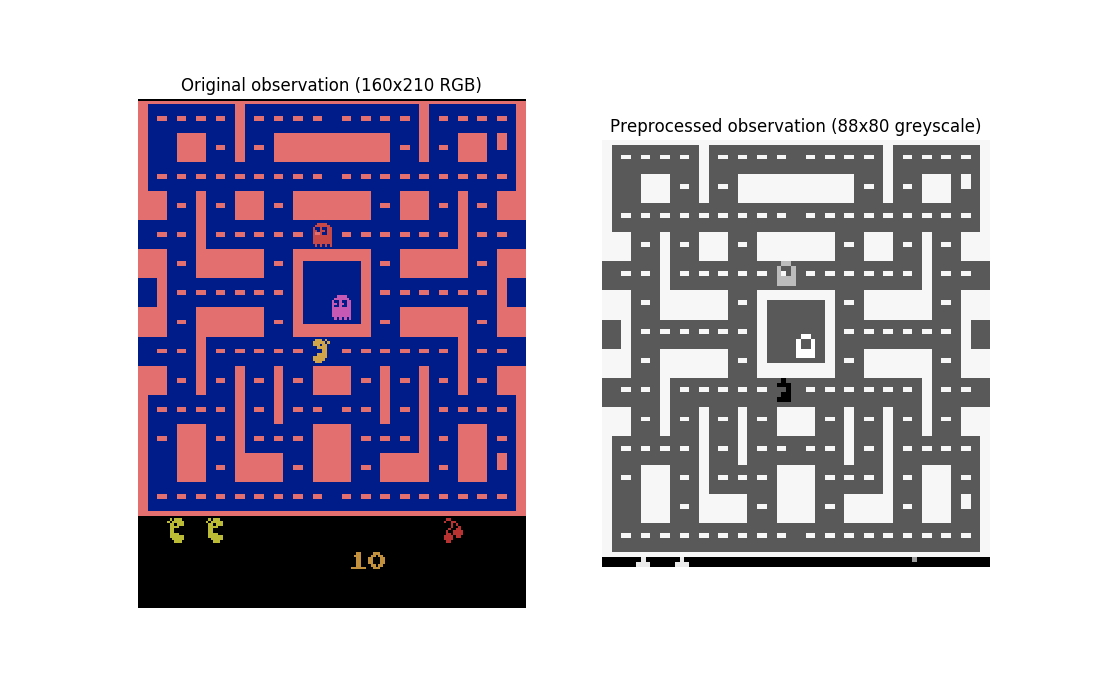

In [98]:
plt.figure(figsize=(11, 7))
plt.subplot(121)
plt.title("Original observation (160x210 RGB)")
plt.imshow(obs)
plt.axis("off")
plt.subplot(122)
plt.title("Preprocessed observation (88x80 greyscale)")
plt.imshow(img.reshape(88, 80), interpolation="nearest", cmap="gray")
plt.axis("off")
plt.savefig("preprocessing_plot")
plt.show()

# Creating the MsPacman environment

In [99]:
env = gym.make("MsPacman-v0")
obs = env.reset()
obs.shape

# THe observations are simply screenshots of the Atari screen represented as 3D Numpy Arrays

(210, 160, 3)

In [100]:
# This command shows that there are nine discrete actions available,
# Which correspond to the 9 possible positions of the joystick.
env.action_space

Discrete(9)

In [101]:
# The Deep Q network training algorithm designed by DeepMind requires two DQNs with the same architecture (but different parameters):
    # the online DQN will learn to drive Ms. Pac-Man
    # the target DQN will be used to build the target Q-Values for training the online DQN
# At regular intervals we will copy the online DQN to the target DQN, replacing its parameters.

#Since we need two DQNs with the same architecture, we will create a q_network() function to build them:

reset_graph()

input_height = 88
input_width = 80
input_channels = 1
conv_n_maps = [32, 64, 64]
conv_kernel_sizes = [(8,8), (4,4), (3,3)]
conv_strides = [4, 2, 1]
conv_paddings = ["SAME"] * 3 
conv_activation = [tf.nn.relu] * 3
n_hidden_in = 64 * 11 * 10  # conv3 has 64 maps of 11x10 each
n_hidden = 512
hidden_activation = tf.nn.relu
n_outputs = env.action_space.n  # 9 discrete actions are available
initializer = tf.variance_scaling_initializer()

def q_network(X_state, name):
    prev_layer = X_state / 128.0 # scale pixel intensities to the [-1.0, 1.0] range.
    with tf.variable_scope(name) as scope:
        for n_maps, kernel_size, strides, padding, activation in zip(
                conv_n_maps, conv_kernel_sizes, conv_strides,
                conv_paddings, conv_activation):
            prev_layer = tf.layers.conv2d(
                prev_layer, filters=n_maps, kernel_size=kernel_size,
                strides=strides, padding=padding, activation=activation,
                kernel_initializer=initializer)
        last_conv_layer_flat = tf.reshape(prev_layer, shape=[-1, n_hidden_in])
        hidden = tf.layers.dense(last_conv_layer_flat, n_hidden,
                                 activation=hidden_activation,
                                 kernel_initializer=initializer)
        outputs = tf.layers.dense(hidden, n_outputs,
                                  kernel_initializer=initializer)
    trainable_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                       scope=scope.name)
    trainable_vars_by_name = {var.name[len(scope.name):]: var
                              for var in trainable_vars}
    return outputs, trainable_vars_by_name
                            
# The first part of this code defines the hyperparameters of the DQN architecture.
# Then the q_network() function is defined to create the DQNs,
# taking the environment's state X_state as input, and the name of the variable scope.
# Note that we will just use one observation to represent the environment's state since there's almost no hidden state
# (except for blinking objects  and the ghosts' directions)

In [102]:
# Now let's create the input placeholder, the two DQNs, and the operation to copy the online DQN to the target DQN:

X_state = tf.placeholder(tf.float32, shape=[None, input_height, input_width, input_channels])
online_q_values, online_vars = q_network(X_state, name="q_networks/online")
target_q_values, target_vars = q_network(X_state, name="q_networks/target")

copy_ops = [target_var.assign(online_vars[var_name])
           for var_name, target_var in target_vars.items()]
copy_online_to_target = tf.group(*copy_ops)

# We now have two DQNs that are both capable of taking an environment state as input,
# and outputting an estimated Q-Value for each possible action in that state.
# Also, we have an operation called copy_online_to_target to copy the values of all trainable variables of the online DQN to the corresponding target DQN variables.


In [103]:
online_vars

{'/conv2d/kernel:0': <tf.Variable 'q_networks/online/conv2d/kernel:0' shape=(8, 8, 1, 32) dtype=float32_ref>,
 '/conv2d/bias:0': <tf.Variable 'q_networks/online/conv2d/bias:0' shape=(32,) dtype=float32_ref>,
 '/conv2d_1/kernel:0': <tf.Variable 'q_networks/online/conv2d_1/kernel:0' shape=(4, 4, 32, 64) dtype=float32_ref>,
 '/conv2d_1/bias:0': <tf.Variable 'q_networks/online/conv2d_1/bias:0' shape=(64,) dtype=float32_ref>,
 '/conv2d_2/kernel:0': <tf.Variable 'q_networks/online/conv2d_2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 '/conv2d_2/bias:0': <tf.Variable 'q_networks/online/conv2d_2/bias:0' shape=(64,) dtype=float32_ref>,
 '/dense/kernel:0': <tf.Variable 'q_networks/online/dense/kernel:0' shape=(7040, 512) dtype=float32_ref>,
 '/dense/bias:0': <tf.Variable 'q_networks/online/dense/bias:0' shape=(512,) dtype=float32_ref>,
 '/dense_1/kernel:0': <tf.Variable 'q_networks/online/dense_1/kernel:0' shape=(512, 9) dtype=float32_ref>,
 '/dense_1/bias:0': <tf.Variable 'q_networks/onl

In [104]:
# In this code we create a Nesterov Accelerated Gradient Optimizer to minimize the loss.
# We also create a nontrainable variable called global_step to track the training step.

learning_rate = 0.001
momentum = 0.95

with tf.variable_scope("train"):
    X_action = tf.placeholder(tf.int32, shape=[None])
    y = tf.placeholder(tf.float32, shape=[None, 1])
    q_value = tf.reduce_sum(online_q_values * tf.one_hot(X_action, n_outputs),
                            axis=1, keep_dims=True)
    error = tf.abs(y - q_value)
    clipped_error = tf.clip_by_value(error, 0.0, 1.0)
    linear_error = 2 * (error - clipped_error)
    loss = tf.reduce_mean(tf.square(clipped_error) + linear_error)

    global_step = tf.Variable(0, trainable=False, name='global_step')
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
    training_op = optimizer.minimize(loss, global_step=global_step)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [105]:
# In the code below, we use this ReplayMemory class instead of a deque because it is much faster for random access.
# Moreover, w edefault to sampling with replacement, which is much faster than sampling without replacement for large replay memories.
# We will also write a small function to randomly sample a batch of experiences from the replay memory.

class ReplayMemory:
    def __init__(self, maxlen):
        self.maxlen = maxlen
        self.buf = np.empty(shape=maxlen, dtype=np.object)
        self.index = 0
        self.length = 0
        
    def append(self,data):
        self.buf[self.index] = data
        self.length = min(self.length + 1, self.maxlen)
        self.index = (self.index + 1) % self.maxlen
        
    def sample(self, batch_size, with_replacement=True):
        if with_replacement:
            indices = np.random.randint(self.length, size=batch_size) # faster
        else:
            indices = np.random.permutation(self.length)[:batch_size]
        return self.buf[indices]

In [106]:
replay_memory_size = 500000
replay_memory = ReplayMemory(replay_memory_size)

In [107]:
# We will also write a small function to randomly sample a batch of experiences from the replay memory.
# Each experience will be a 5-tuple(state, action, reward, next state, continue),


def sample_memories(batch_size):
    cols = [[], [], [], [], []] # state, action, reward, next_state, continue
    for memory in replay_memory.sample(batch_size):
        for col, value in zip(cols, memory):
            col.append(value)
    cols = [np.array(col) for col in cols]
    return cols[0], cols[1], cols[2].reshape(-1, 1), cols[3], cols[4].reshape(-1, 1)

In [108]:
# Next, we will need the agent to explore the game.
# We will use the Epsilon-greedy policy,
# And gradually decrease epsilon from 1.0 to 0.1, in two million training steps:

eps_min = 0.1
eps_max = 1.0
eps_decay_steps = 2000000

def epsilon_greedy(q_values, step):
    epsilon = max(eps_min, eps_max - (eps_max-eps_min) * step/eps_decay_steps)
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs) # random action
    else:
        return np.argmax(q_values) # optimal action

In [109]:
# That's it. We have all we need to start training.
# Now we start the execution phase.

# First, let's set a few parameters:

n_steps = 4000000  # total number of training steps
training_start = 10000  # start training after 10,000 game iterations
training_interval = 4  # run a training step every 4 game iterations
save_steps = 1000  # save the model every 1,000 training steps
copy_steps = 10000 # copy online DQN to target DQN every 10,000 training steps
discount_rate = 0.99
skip_start = 90 # Skip the start of every game (It's just waiting time).
batch_size = 50
iteration = 0 # game iterations
checkpoint_path = "./my_dqn.ckpt"
done = True # env needs to be be reset

In [ ]:
# A few variables for tracking progress:

loss_val = np.infty
game_length = 0
total_max_q = 0
mean_max_q = 0.0

In [ ]:
# And now with the main training loop:

with tf.Session() as sess:
    if os.path.isfile(checkpoint_path + ".index"):
        saver.restore(sess, checkpoint_path)
    else:
        init.run()
        copy_online_to_target.run()
    while True:
        step = global_step.eval()
        if step >= n_steps:
            break
        iteration += 1
        print("\rIteration {}\tTraining step {}/{} ({:.1f})%\tLoss {:5f}\tMean Max-Q {:5f}   ".format(
            iteration, step, n_steps, step * 100 / n_steps, loss_val, mean_max_q), end="")
        if done: # game over, start again
            obs = env.reset()
            for skip in range(skip_start): # skip the start of each game
                obs, reward, done, info = env.step(0)
            state = preprocess_observation(obs)

        # Online DQN evaluates what to do
        q_values = online_q_values.eval(feed_dict={X_state: [state]})
        action = epsilon_greedy(q_values, step)

        # Online DQN plays
        obs, reward, done, info = env.step(action)
        next_state = preprocess_observation(obs)

        # Let's memorize what happened
        replay_memory.append((state, action, reward, next_state, 1.0 - done))
        state = next_state

        # Compute statistics for tracking progress (not shown in the book)
        total_max_q += q_values.max()
        game_length += 1
        if done:
            mean_max_q = total_max_q / game_length
            total_max_q = 0.0
            game_length = 0

        if iteration < training_start or iteration % training_interval != 0:
            continue # only train after warmup period and at regular intervals
        
        # Sample memories and use the target DQN to produce the target Q-Value
        X_state_val, X_action_val, rewards, X_next_state_val, continues = (
            sample_memories(batch_size))
        next_q_values = target_q_values.eval(
            feed_dict={X_state: X_next_state_val})
        max_next_q_values = np.max(next_q_values, axis=1, keepdims=True)
        y_val = rewards + continues * discount_rate * max_next_q_values
        
        
        

In [113]:
# You can interrupt the cell above at any time to test your agent using the cell below.
# You can then run the cell above once again, it will load the last parameters saved and resume training:

frames = []
n_max_steps = 10000

with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)
    
    obs = env.reset()
    for step in range(n_max_steps):
        state = preprocess_observation(obs)
        
        # Online DQN evaluates what to do
        q_values = online_q_values.eval(feed_dict={X_state: [state]})
        action = np.argmax(q_values)
        
        # Online DQN plays
        obs, reward, done, info = env.step(action)
        
        img = env.render(mode="rgb_array")
        frames.append(img)
        
        if done:
            break

INFO:tensorflow:Restoring parameters from ./my_dqn.ckpt


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./my_dqn.ckpt
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/lam/ml/env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/lam/ml/env/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/lam/ml/env/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/home/lam/ml/env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/lam/ml/env/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/lam/ml/env/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/lam/ml/env/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/lam/ml/env/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/lam/ml/env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/lam/ml/env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/lam/ml/env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/lam/ml/env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/lam/ml/env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/home/lam/ml/env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/lam/ml/env/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/lam/ml/env/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/lam/ml/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/lam/ml/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/home/lam/ml/env/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/lam/ml/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/lam/ml/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/lam/ml/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-104-42db8deadfc5>", line 22, in <module>
    saver = tf.train.Saver()
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1218, in __init__
    self.build()
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 751, in _build_internal
    restore_sequentially, reshape)
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 427, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 267, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1021, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./my_dqn.ckpt
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


In [ ]:
plot_animation(frames)